<a href="https://colab.research.google.com/github/fercho-116/practicalwork/blob/main/practicalwork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7108 - loss: 0.9964 - val_accuracy: 0.8789 - val_loss: 0.4130
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8936 - loss: 0.3737 - val_accuracy: 0.9117 - val_loss: 0.3055
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9234 - loss: 0.2747 - val_accuracy: 0.9250 - val_loss: 0.2572
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9400 - loss: 0.2182 - val_accuracy: 0.9349 - val_loss: 0.2227
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9521 - loss: 0.1813 - val_accuracy: 0.9441 - val_loss: 0.1961
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9629 - loss: 0.1473 - val_accuracy: 0.9467 - val_loss: 0.1810
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9697 - loss: 0.1231 - val_accuracy: 0.9509 - val_loss: 0.1683
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9745 - loss: 0.1060 - val_

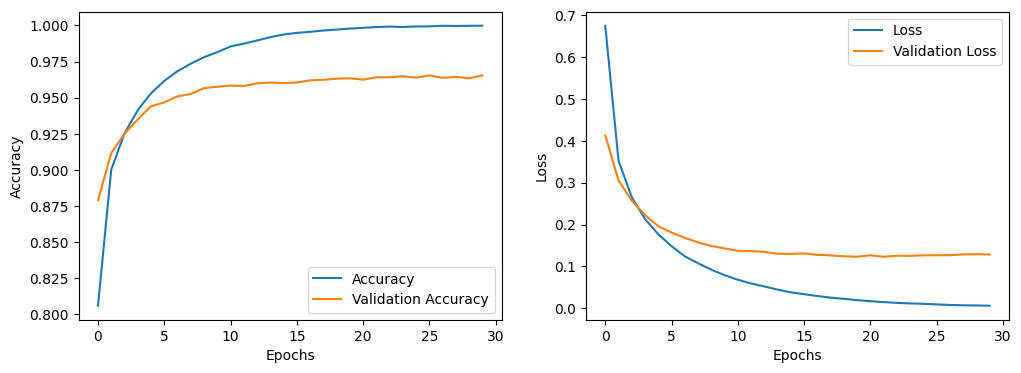

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

# Cargar dataset KMNIST
dataset = tfds.load("kmnist", split=["train", "test"], as_supervised=True)
train_dataset, test_dataset = dataset[0], dataset[1]

# Convertir dataset a numpy arrays
x_train, y_train = [], []
x_test, y_test = [], []

for image, label in train_dataset:
    x_train.append(image.numpy())
    y_train.append(label.numpy())
for image, label in test_dataset:
    x_test.append(image.numpy())
    y_test.append(label.numpy())

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

# Normalización de datos (entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dividir datos en Train, Validation y Test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Aplanar imágenes para MLP (de 28x28 a 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convertir etiquetas en formato categórico
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Hiperparámetros ajustados
batch_size = 256
learning_rate = 0.0003
epochs = 30

# Definir modelo MLP
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar modelo
model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar modelo
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# Graficar rendimiento
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_metrics(history)